<center>

# __Analysis of Sales Impact Following Website Feature Launch__
John "Jack" Cournoyer <br>
March 2024

<center>

---


> ## Executive Summary
> In the digital era, launching new website features is often hailed as a silver bullet for boosting sales and enhancing customer engagement. Yet, the absence of hard data leaves businesses navigating in the dark, unsure of the real-world impact of these initiatives. This analysis seeks to shed light on this dilemma by quantitatively dissecting the sales implications of a theoretical website feature rollout, aiming to demystify its actual effect on a company's bottom line.
> 
> ## Goal Statement
> This study zeros in on critical financial metrics—monthly sales revenue, average revenue per customer (ARPC), and average order value (AOV)—to unearth pivotal trends, shifts in consumer spending habits, and order value dynamics surrounding the launch of a new website feature. The aim is to provide a panoramic view of the launch's impact, charting the trajectory of sales performance and customer behavior before and after the event.
> 
> ## Scope
> Spanning a critical twelve-month period—six months on either side of the website feature debut—our analysis will meticulously examine sales data to identify and interpret shifts in key performance indicators (KPIs) such as...
> * Monthly sales revenue and its month-to-month percent change to capture immediate and short-term impacts.
> * Average revenue per customer to understand shifts in customer value.
> * Average order value (AOV) to assess changes in purchasing behavior.
> 
> ## Data Sources and Methodology
> Leveraging a constructed dataset that simulates sales transactions before and after a website launch, this project employs a combination of trend analysis, rolling averages for smoothing short-term fluctuations, and comparative analysis to evaluate the impact. Visualizations will be key in illustrating trends and anomalies in the data, with a special emphasis on highlighting critical junctures, such as the website launch date.
> 
> ## Expected Outcomes
> The analysis is expected to reveal detailed insights into how the website launch influenced sales performance. Specific outcomes may include:
> * Identification of any significant trends in sales growth or decline correlated with the website launch.
> * Insights into customer behavior changes, as evidenced by variations in average revenue per customer and AOV.
> * Recommendations for strategic decisions based on the analysis of pre-and post-launch data.
> * By meticulously analyzing the data through the lenses provided by the outlined objectives and methodologies, the project aims to offer a grounded understanding of the website launch's impact, thereby informing future digital strategy and investment decisions.
> 
> ## Visual Format
> To vividly illustrate our findings, each critical component of our analysis will be complemented by a trio of visuals:* Sum Aggregated Line Chart
> * Percent Change Line Chart
> * Tabular Format

---


### __Step 1:__ Importing Essential Libraries
---
> This initial step involves importing the necessary libraries, essential for our data analysis and visualization tasks. A confirmation message will appear once these libraries are successfully loaded, ensuring they're ready for use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math
import plotly.graph_objects as go
import tabulate


print("Libraries Imprted Successfully")

Libraries Imprted Successfully


### __Step 2:__ Loading Data
---
> Following the import of essential libraries, we leverage pandas to read the CSV file and transform it into a DataFrame. This process is encapsulated within a function that verifies the successful data import through print statements, ensuring the data path is correctly accessed and ready for analysis.

In [2]:
def read_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Success: Data read successfully from '{file_path}'.")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.ParserError as e:
        print(f"Error: Parsing the file '{file_path}' failed. {e}")
    return pd.DataFrame()


# Main script execution
file_path = "data files/transaction_table.csv"
df = read_data(file_path)

Success: Data read successfully from 'data files/transaction_table.csv'.


### __Step 3:__ Preparing the Data
---

> Once we've loaded the data into a DataFrame, our next move is to scrutinize and refine it, ensuring it's primed for analysis. This step encompasses cleaning, structuring, and transforming the dataset to align with analytical standards. Key to this phase is the use of the "tabulate" library, which aids in presenting data in a structured, business-friendly format. By focusing on making the data comprehensible and relatable to business stakeholders, we underscore the importance of accessibility in data analytics, setting a solid foundation for insightful and consistent analysis outcomes.

In [3]:
# rename the df
df_filtered = df
# look at the shape of the df
print("Dataframe Shape:", df_filtered.shape)
print("-----------------------------")
print("Dataframe Columns:", df_filtered.columns)

# drop the columns that are not needed which are quarter_year, year_month
columns_to_drop = [
    "quarter_year",
    "year_month",
    "order_state_id",
    "sales_territory_id",
    "product_line_id",
    "sales_territory",
    "state_abbrv",
    "state_name",
]

for column in columns_to_drop:

    if column in df_filtered.columns:

        df_filtered = df_filtered.drop(columns=[column])
print(
    "------------------------ Dataframe Columns after dropping columns ------------------------"
)
# Inspect the the first 5 rows and last 5 rows of the dataframe using tabulate
tablefmt = "rounded_grid"
# limit the number of columns displayed to 5
print("First 5 rows of the dataframe:")
print(
    tabulate.tabulate(
        df_filtered.head(),
        headers="keys",
        tablefmt=tablefmt,
        showindex=False,
    )
)
print("Last 5 rows of the dataframe:")
print(
    tabulate.tabulate(
        df_filtered.tail(), headers="keys", tablefmt=tablefmt, showindex=False
    )
)

# inspect columns and data types in the dataset
print("Original Data Types:")
print("----------------------")
print(df_filtered.dtypes)
print("----------------------")
# change the data type of the invoice_date to datetime

# Correctly convert the 'invoice_date' to datetime format
df_filtered["invoice_date"] = pd.to_datetime(df_filtered["invoice_date"])

# Filter the DataFrame based on 'invoice_date'
df_filtered = df_filtered[
    (df_filtered["invoice_date"] >= "2022-08-01")
    & (df_filtered["invoice_date"] <= "2023-08-31")
]

# Add 'year_month_eng' based on 'invoice_date'
df_filtered["year_month_eng"] = df_filtered["invoice_date"].dt.strftime("%Y-%m")

Dataframe Shape: (112859, 14)
-----------------------------
Dataframe Columns: Index(['invoice_id', 'invoice_date', 'revenue', 'customer_id', 'order_id',
       'product_line_id', 'order_state_id', 'sales_territory_id',
       'sales_territory', 'state_abbrv', 'state_name', 'year_month_eng',
       'quarter_year', 'year_month'],
      dtype='object')
------------------------ Dataframe Columns after dropping columns ------------------------
First 5 rows of the dataframe:
╭──────────────┬────────────────┬───────────┬───────────────┬────────────┬──────────────────╮
│   invoice_id │ invoice_date   │   revenue │   customer_id │   order_id │ year_month_eng   │
├──────────────┼────────────────┼───────────┼───────────────┼────────────┼──────────────────┤
│         3152 │ 12/1/2022      │     390   │          7402 │    2358561 │ 22-Dec           │
├──────────────┼────────────────┼───────────┼───────────────┼────────────┼──────────────────┤
│         2992 │ 12/1/2022      │      47.5 │         1

### __Step 4:__ Reviewing Data Transformations
---
> After refining our dataset, it's crucial to meticulously review the transformations applied. This step involves a thorough examination of the data to confirm that the cleaning, structuring, and transformation processes have indeed prepared it for accurate analysis. By employing tools such as the "tabulate" library for a second glance, we aim to ensure that the data not only adheres to our analytical requirements but also maintains its integrity and relevance to the business context. This verification phase is pivotal, as it guarantees that our dataset is not just technically ready but also meaningful and actionable from a business perspective, thereby enhancing the reliability and impact of our subsequent analyses.

In [4]:
# print the new data types of the df
print("Updated Data Types:")
print("----------------------")
print(df_filtered.dtypes)
print("----------------------")

print("First 5 rows of the dataframe:")


tablefmt = "rounded_grid"
print(
    tabulate.tabulate(
        df_filtered.head(),
        headers="keys",
        tablefmt=tablefmt,
        showindex=False,
        numalign="center",
        stralign="center",
    )
)


print("Last 5 rows of the dataframe:")
print(
    tabulate.tabulate(
        df_filtered.tail(),
        headers="keys",
        tablefmt=tablefmt,
        showindex=False,
        numalign="center",
        stralign="center",
    )
)

Updated Data Types:
----------------------
invoice_id                 int64
invoice_date      datetime64[ns]
revenue                  float64
customer_id                int64
order_id                   int64
year_month_eng            object
dtype: object
----------------------
First 5 rows of the dataframe:
╭──────────────┬─────────────────────┬───────────┬───────────────┬────────────┬──────────────────╮
│  invoice_id  │    invoice_date     │  revenue  │  customer_id  │  order_id  │  year_month_eng  │
├──────────────┼─────────────────────┼───────────┼───────────────┼────────────┼──────────────────┤
│     3152     │ 2022-12-01 00:00:00 │    390    │     7402      │  2358561   │     2022-12      │
├──────────────┼─────────────────────┼───────────┼───────────────┼────────────┼──────────────────┤
│     2992     │ 2022-12-01 00:00:00 │   47.5    │     10116     │  2312008   │     2022-12      │
├──────────────┼─────────────────────┼───────────┼───────────────┼────────────┼──────────────────

### __Step 5:__ Ensuring Data Quality
---
> This crucial phase involves scrutinizing the dataset for null entries and duplicate records. High-quality data is paramount for reliable analysis; thus, identifying and addressing these issues is essential. We'll methodically search for and rectify null values to ensure completeness, and remove any duplicates to maintain data integrity. This process not only cleanses our dataset but also reinforces its accuracy and trustworthiness

In [5]:
# Check for null values
print("Null Count:")
print("-----------------------")
print(df_filtered.isnull().sum())
# check for duplicates
print("-----------------------")
print("Duplicate Count:")
print(df_filtered.duplicated().sum())

Null Count:
-----------------------
invoice_id        0
invoice_date      0
revenue           0
customer_id       0
order_id          0
year_month_eng    0
dtype: int64
-----------------------
Duplicate Count:
0


### __Step 6:__ Data Exploration and Familiarization
---

> In this essential phase, we dive into a preliminary exploration of the dataset to get acquainted with its various aspects. This process includes breaking down the data into several dimensions, allowing us to assess its overall scope and identify any initial patterns or anomalies. Understanding the dataset's structure, variables, and potential quirks at this early stage helps ensure that our analysis is informed and focused, directly addressing the nuances and complexities of the data at hand.


In [6]:
def analyze_and_print_summary(df_filtered):
    """Analyzes and prints summary statistics of the DataFrame."""
    try:
        # Create a dictionary to hold the summary statistics
        summary_data = {
            "Metric": [
                "Min Date",
                "Max Date",
                "Max Revenue",
                "Min Revenue",
                "Average Revenue",
                "Standard Deviation Revenue",
                "Unique Customers",
                "Unique Orders",
            ],
            "Value": [
                df_filtered["invoice_date"].min().date(),  # Min Date
                df_filtered["invoice_date"].max().date(),  # Max Date
                "${:,.2f}".format(df_filtered["revenue"].max()),  # Max Revenue
                "${:,.2f}".format(df_filtered["revenue"].min()),  # Min Revenue
                "${:,.2f}".format(df_filtered["revenue"].mean()),  # Average Revenue
                "${:,.2f}".format(
                    df_filtered["revenue"].std()
                ),  # Standard Deviation Revenue
                df_filtered["customer_id"].nunique(),  # Unique Customers
                df_filtered["order_id"].nunique(),  # Unique Orders
            ],
        }

        # Create a DataFrame from the summary data
        summary_df = pd.DataFrame(summary_data)

        # Print the summary DataFrame using tabulate
        tablefmt = "rounded_grid"
        print(
            tabulate.tabulate(
                summary_df,
                headers="keys",
                tablefmt=tablefmt,
                showindex=False,
                numalign="center",
                stralign="center",
            )
        )
    except Exception as e:
        print(f"An error occurred: {e}")


# Call the function with the appropriate DataFrame
analyze_and_print_summary(df_filtered)

╭────────────────────────────┬────────────╮
│           Metric           │   Value    │
├────────────────────────────┼────────────┤
│          Min Date          │ 2022-08-01 │
├────────────────────────────┼────────────┤
│          Max Date          │ 2023-08-31 │
├────────────────────────────┼────────────┤
│        Max Revenue         │  $938.92   │
├────────────────────────────┼────────────┤
│        Min Revenue         │   $0.25    │
├────────────────────────────┼────────────┤
│      Average Revenue       │   $93.99   │
├────────────────────────────┼────────────┤
│ Standard Deviation Revenue │  $111.32   │
├────────────────────────────┼────────────┤
│      Unique Customers      │    2083    │
├────────────────────────────┼────────────┤
│       Unique Orders        │   112819   │
╰────────────────────────────┴────────────╯


### __Step 7:__ Establishing Legends for Visuals
---

> Prior to crafting the visual representations of our analysis, we focus on defining the legends that will accompany our line graphs. This step is aimed at enhancing visual consistency across all graphical outputs. By standardizing the legends early on, we ensure that each visual element communicates effectively, maintaining clarity and coherence in how data insights are presented. This preparation is key to creating intuitive and informative visuals that resonate with the audience.

In [7]:
# Function creates additional legend labels for mean, median, min, and max which will be used in the legends of the plots.
def create_additional_legend_labels(df, column_name):
    max_value = df[column_name].max()
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    min_value = df[column_name].min()
    mean_label = f"Mean: ${mean_value:,.2f}"
    median_label = f"Median: ${median_value:,.2f}"
    min_label = f"Min: ${min_value:,.2f}"
    max_label = f"Max: ${max_value:,.2f}"
    return mean_label, median_label, min_label, max_label


def create_legend(handles_labels):
    # plot the legend outside the visual on the top right
    plt.legend(
        handles=[handle for handle, label in handles_labels],
        labels=[label for handle, label in handles_labels],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
    )


print("Legend Labels Defined")

Legend Labels Defined


### __Step 8:__ Assessing the Impact of the February 2023 Launch on Sales
---
In this step, we utilize three tailored functions to directly assess how the February 2023 website feature launch has influenced sales performance, offering a blend of visual and quantitative analyses to capture the nuances of this impact.

> ### 8.1 Analyzing Monthly Sales Trends
> monthly_sales_sum_plot(df_filtered): This function crafts a visual narrative of monthly sales revenue, pinpointing how sales figures evolve over time. By plotting total sales alongside a 3-month rolling average, it provides a smoothed perspective on sales trends. Crucially, it highlights February 2023 with a distinct marker, enabling us to visually assess the immediate and lingering effects of the website launch on sales performance.
> 
> ### 8.2 Tracking Revenue Changes Month-to-Month
> monthly_revenue_change_plot(df_filtered): To capture the volatility and direction of sales changes, this function visualizes the percentage change in revenue from one month to the next. Incorporating a 3-month rolling average helps in identifying broader trends obscured by monthly fluctuations. This analysis is essential for understanding if the February 2023 launch acted as a catalyst for significant sales variations, indicating its impact on business momentum.
> 
> ### 8.3 Tabular Insights on Revenue Variation
> monthly_revenue_table(df_filtered): Providing a granular view, this function tabulates the month-to-month percent changes in revenue, presenting them in an accessible, table format. This detailed breakdown facilitates a straightforward comparison of sales performance before and after the February launch, offering clear, numeric evidence of its effects.

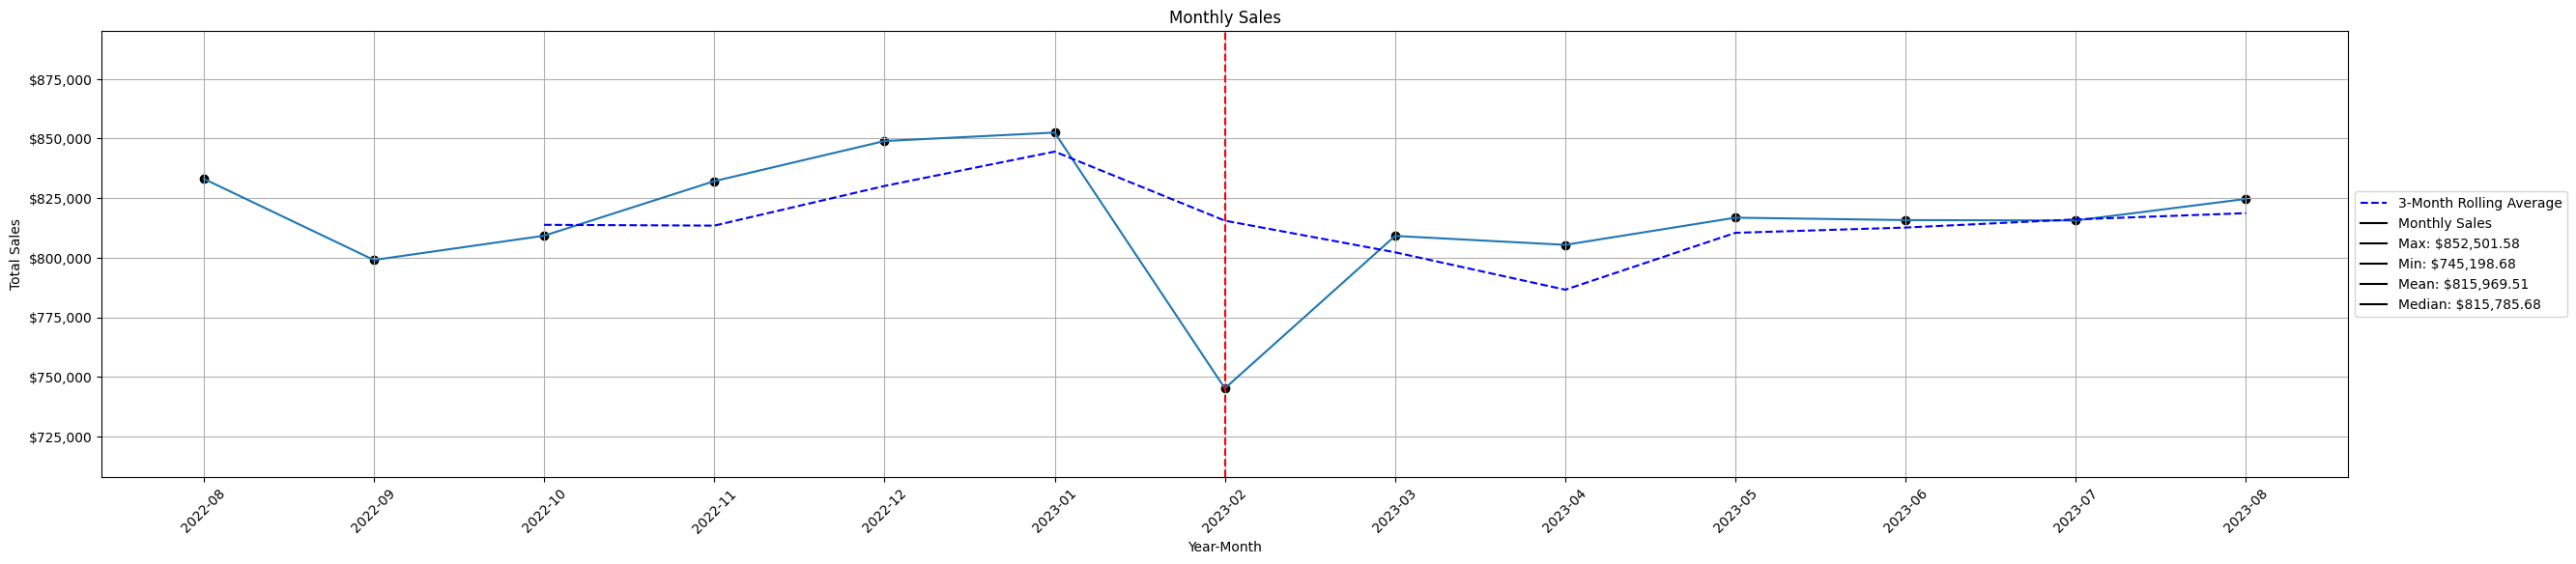

In [8]:
# visualize the monthly sales in a line plot to see the trend, looking for outliers and insights
def monthly_sales_sum_plot(df_filtered):
    """Visualize the monthly sales trend."""
    try:
        # Group and sum the filtered DataFrame
        monthly_sales = (
            df_filtered.groupby("year_month_eng")["revenue"].sum().reset_index()
        )

        plt.figure(figsize=(30, 6))
        sns.lineplot(data=monthly_sales, x="year_month_eng", y="revenue")
        plt.scatter(
            monthly_sales["year_month_eng"], monthly_sales["revenue"], color="black"
        )

        plt.plot(
            monthly_sales["year_month_eng"],
            monthly_sales["revenue"].rolling(window=3).mean(),
            color="blue",
            linestyle="--",
            label="3-Month Rolling Average",
            markerfacecolor="black",
        )

        plt.axvline(
            x=6, color="red", linestyle="--", markerfacecolor="black", label="Feb 2023"
        )

        plt.axhline(y=0, color="black", linestyle="-")
        max_monthly_sales = monthly_sales["revenue"].max()
        min_monthly_sales = monthly_sales["revenue"].min()
        if pd.isna(max_monthly_sales) or math.isinf(max_monthly_sales):
            max_monthly_sales = 0
        if pd.isna(min_monthly_sales) or math.isinf(min_monthly_sales):
            min_monthly_sales = 0

        y_min_limit = min_monthly_sales * 0.95
        y_max_limit = max_monthly_sales * 1.05
        plt.ylim(y_min_limit, y_max_limit)
        plt.title("Monthly Sales")
        plt.xlabel("Year-Month")
        plt.ylabel("Total Sales")

        plt.gca().yaxis.set_major_formatter("${:,.0f}".format)
        plt.xticks(rotation=45)
        # Calculate additional metrics
        mean_sales = monthly_sales["revenue"].mean()
        median_sales = monthly_sales["revenue"].median()
        # Create additional legend labels
        mean_label, median_label, min_label, max_label = (
            create_additional_legend_labels(monthly_sales, "revenue")
        )

        handles_markers_labels = [
            (
                plt.Line2D([], [], color="blue", linestyle="--"),
                "3-Month Rolling Average",
            ),
            (plt.Line2D([], [], color="black", linestyle="-"), "Monthly Sales"),
        ]
        handles_max_min = [
            (plt.Line2D([], [], color="black", linestyle="-"), max_label),
            (plt.Line2D([], [], color="black", linestyle="-"), min_label),
        ]
        handles_stats = [
            (plt.Line2D([], [], color="black", linestyle="-"), mean_label),
            (plt.Line2D([], [], color="black", linestyle="-"), median_label),
        ]

        # Combine handles and labels from all legends in the desired order
        handles_labels = handles_markers_labels + handles_max_min + handles_stats
        # Create the legend
        create_legend(handles_labels)
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


# Call the function with the appropriate DataFrame
monthly_sales_sum_plot(df_filtered)

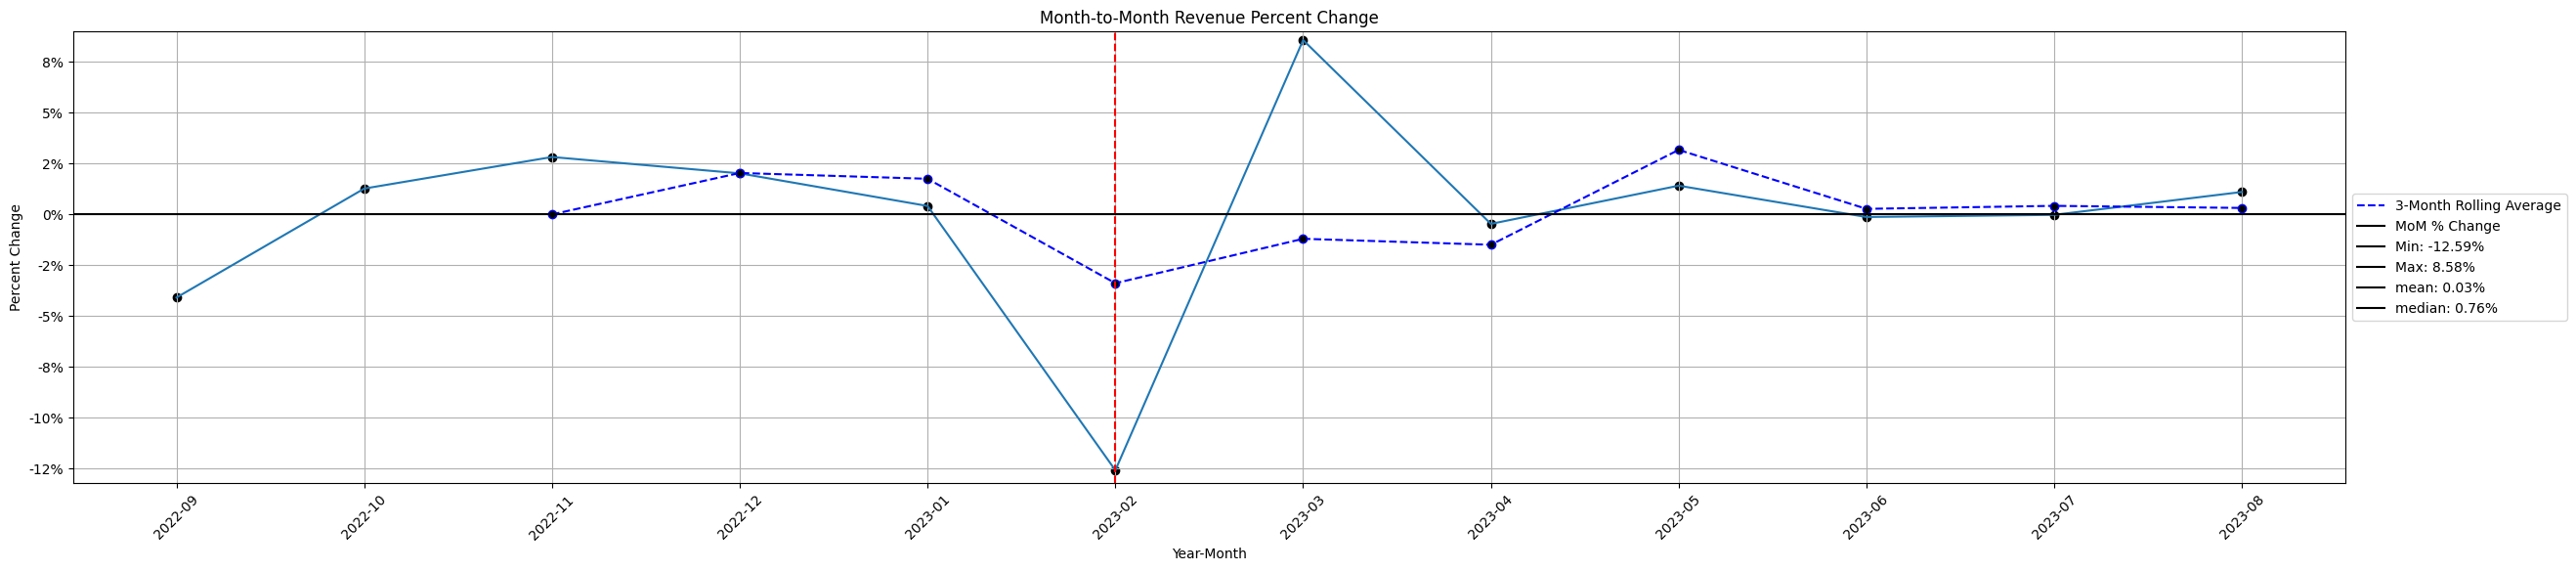

In [9]:
# Vizualize the percent change from month to month in revenue to see the trend.


def monthly_revenue_change_plot(df_filtered):
    """Visualize the month-to-month percent change in revenue."""

    try:

        # Calculate the month-to-month percent change in revenue
        monthly_sales = (
            df_filtered.groupby("year_month_eng")["revenue"].sum().reset_index()
        )

        monthly_sales["percent_change"] = monthly_sales["revenue"].pct_change() * 100

        plt.figure(figsize=(30, 6))

        sns.lineplot(data=monthly_sales, x="year_month_eng", y="percent_change")
        plt.scatter(
            monthly_sales["year_month_eng"],
            monthly_sales["percent_change"],
            color="black",
        )
        plt.plot(
            monthly_sales["year_month_eng"],
            monthly_sales["percent_change"].rolling(window=3).mean(),
            color="blue",
            linestyle="--",
            marker="o",
            label="3-Month Rolling Average",
            markerfacecolor="black",
        )

        plt.axvline(x=6, color="red", linestyle="--", label="Feb 2023")

        plt.axhline(y=0, color="black", linestyle="-")

        # Adjust y-axis limits based on the percent change range, adding a buffer for clarity

        max_change = monthly_sales["percent_change"].max()

        min_change = monthly_sales["percent_change"].min()

        y_min_limit = min_change - (abs(min_change) * 0.05)

        y_max_limit = max_change + (abs(max_change) * 0.05)

        plt.ylim(y_min_limit, y_max_limit)

        plt.title("Month-to-Month Revenue Percent Change")

        plt.xlabel("Year-Month")

        plt.ylabel("Percent Change")

        plt.xticks(rotation=45)

        # Format y-axis to show percentage

        plt.gca().yaxis.set_major_formatter("{:,.0f}%".format)

        # Calculate additional metrics

        mean_sales = monthly_sales["percent_change"].mean()

        median_sales = monthly_sales["percent_change"].median()

        # Create additional legend labels

        handles_markers_labels = [
            (
                plt.Line2D([], [], color="blue", linestyle="--"),
                "3-Month Rolling Average",
            ),
            (plt.Line2D([], [], color="black", linestyle="-"), "MoM % Change"),
        ]

        handles_max_min = [
            (
                plt.Line2D([], [], color="black", linestyle="-"),
                f"Min: {min_change:.2f}%",  # Corrected to uppercase "M"
            ),
            (
                plt.Line2D([], [], color="black", linestyle="-"),
                f"Max: {max_change:.2f}%",
            ),
        ]

        handles_stats = [
            (
                plt.Line2D([], [], color="black", linestyle="-"),
                f"mean: {mean_sales:.2f}%",
            ),
            (
                plt.Line2D([], [], color="black", linestyle="-"),
                f"median: {median_sales:.2f}%",
            ),
        ]

        # Combine handles and labels from all legends in the desired order

        handles_labels = handles_markers_labels + handles_max_min + handles_stats

        # Create the legend

        create_legend(handles_labels)

        plt.grid(True)

        plt.show()

    except Exception as e:

        print(f"An error occurred: {e}")


# Call the function with the appropriate DataFrame


monthly_revenue_change_plot(df_filtered)

In [10]:
# Create a tabular representation of the month-to-month percent change in revenue to assist with validation and allow for easy business stakeholder consumption.
def monthly_revenue_table(df_filtered):
    """Visualize the month-to-month percent change in revenue."""

    try:

        # Calculate the month-to-month percent change in revenue

        monthly_sales = (
            df_filtered.groupby("year_month_eng")["revenue"].sum().reset_index()
        )

        # Calculate percent change

        monthly_sales["percent_change"] = monthly_sales["revenue"].pct_change() * 100

        # Replace NaN values with 0

        monthly_sales["percent_change"] = monthly_sales["percent_change"].fillna(0)

        # Format the revenue and percent_change columns

        monthly_sales["revenue"] = monthly_sales["revenue"].apply(
            lambda x: "${:,.2f}".format(x)
        )

        monthly_sales["percent_change"] = monthly_sales["percent_change"].apply(
            lambda x: "{:.2f}%".format(x)
        )

        # rename the year_month_eng column to Month-Year, the revenue column to Revenue, and the percent_change column to Percent Change

        monthly_sales = monthly_sales.rename(
            columns={
                "year_month_eng": "Month-Year",
                "revenue": "Revenue",
                "percent_change": "Percent Change",
            }
        )

        # Print the monthly revenue change in a table using tabulate

        print("Monthly Revenue Change:")

        tablefmt = "rounded_grid"

        print(
            tabulate.tabulate(
                monthly_sales,
                headers="keys",
                tablefmt=tablefmt,
                showindex=False,
                numalign="center",
                stralign="center",
            )
        )

    except Exception as e:

        print(f"An error occurred: {e}")


# Call the function
monthly_revenue_table(df_filtered)

Monthly Revenue Change:
╭──────────────┬─────────────┬──────────────────╮
│  Month-Year  │   Revenue   │  Percent Change  │
├──────────────┼─────────────┼──────────────────┤
│   2022-08    │ $833,114.55 │      0.00%       │
├──────────────┼─────────────┼──────────────────┤
│   2022-09    │ $799,054.59 │      -4.09%      │
├──────────────┼─────────────┼──────────────────┤
│   2022-10    │ $809,238.17 │      1.27%       │
├──────────────┼─────────────┼──────────────────┤
│   2022-11    │ $832,118.96 │      2.83%       │
├──────────────┼─────────────┼──────────────────┤
│   2022-12    │ $848,952.57 │      2.02%       │
├──────────────┼─────────────┼──────────────────┤
│   2023-01    │ $852,501.58 │      0.42%       │
├──────────────┼─────────────┼──────────────────┤
│   2023-02    │ $745,198.68 │     -12.59%      │
├──────────────┼─────────────┼──────────────────┤
│   2023-03    │ $809,140.65 │      8.58%       │
├──────────────┼─────────────┼──────────────────┤
│   2023-04    │ $805,394.

## Monthly Revenue Trends Assessment: 

---
>### Pre-Launch Trend: 
> * Leading up to the launch in February 2023, there was a general trend of gradual sales increase. From August 2022 to January 2023, monthly sales experienced fluctuations but followed an upward trajectory, culminating in $852,501.58 in January 2023. This indicates a healthy growth pattern with minor variances.
>
>### Impact of Launch: 
> * February 2023 marked a significant drop in sales revenue to $745,198.68, translating to a -12.59% change from the previous month. This abrupt decline immediately following the website feature launch suggests a direct correlation between the launch and sales performance, indicating that the launch may have had a negative impact on sales, contrary to expectations.
>
>### Post-Launch Recovery: 
> * After the initial decline in February, sales began to recover in March 2023 with an 8.58% increase, bringing revenue up to $809,140.65. However, this recovery was followed by a slight decrease in April and minimal fluctuations in the subsequent months, indicating instability in the sales pattern post-launch.
>
>### Long-Term View: 
> * By August 2023, sales showed signs of stabilization with a slight increase to $824,669.52, although not fully recovering to pre-launch levels. This suggests that while the negative impact of the launch was significant, the market began to adjust, leading to a slow but steady recovery.

## __Step 9:__ Delving into Average Revenue Per Customer (ARPC)
---
This step encompasses a trio of functions tailored to assess the Average Revenue Per Customer (ARPC), providing a lens through which to view the website feature launch's impact on customer spending behavior.

> ### 9.1 Visual Trend Analysis of ARPC
> avg_revenue_per_customer_plot(df_filtered): Through this function, we graph the monthly ARPC, laying out a visual trend that highlights changes over time. By correlating these changes with the website feature launch in February 2023, we aim to identify any immediate or gradual shifts in customer spending. This visual tool also integrates a 3-month rolling average to smooth out the data, offering a clearer perspective on long-term trends.
>
> ### 9.2 Month-to-Month ARPC Change Visualization
> monthly_avg_revenue_per_customer_change_plot(df_filtered): This function extends our analysis by plotting the month-to-month percentage change in ARPC. It aids in pinpointing specific periods of increase or decline in average revenue per customer, thereby revealing the nuanced effects of the February 2023 launch. By observing these fluctuations, we can gauge the launch's success in influencing customer spending.
>
 >### 9.3 Tabular Overview of ARPC Changes
> monthly_average_revenue_per_customer_change_table(df_filtered): Complementing our visual analyses, this function presents a tabulated view of the ARPC changes, offering a month-to-month comparison. This detailed table format is instrumental for a granular examination of ARPC fluctuations, facilitating easy digestion and discussion among business stakeholders. By laying out this data, we can directly assess the website feature launch's impact on ARPC, grounding our findings in solid, actionable data.

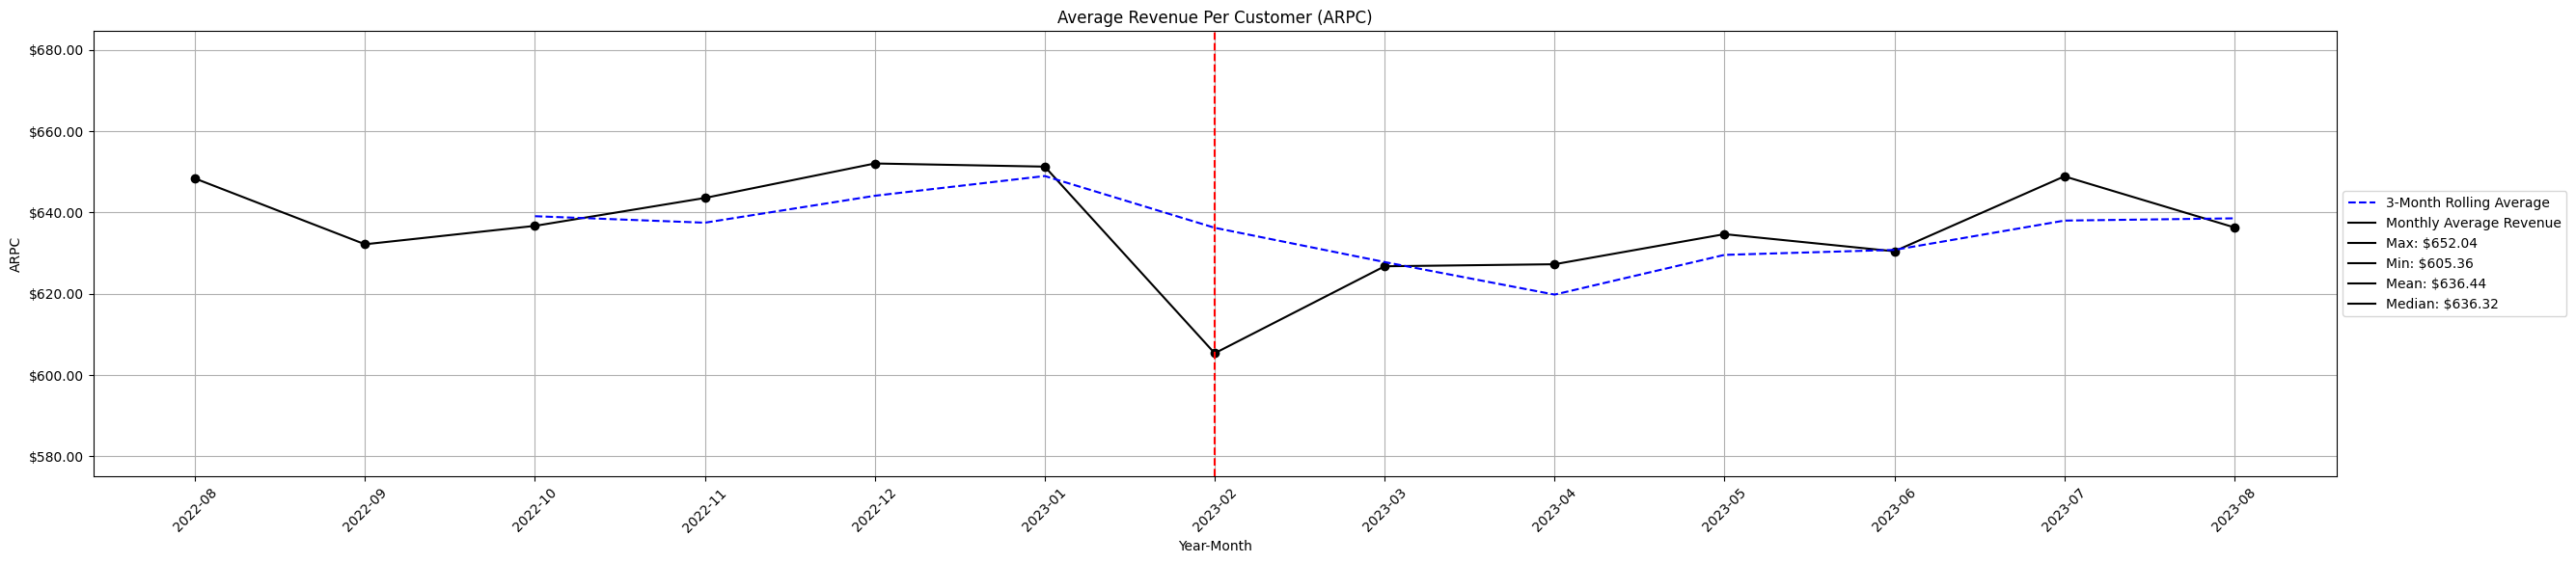

In [11]:
# Plot the monthly average revenue per customer to see the trend and identify any outliers.


def avg_revenue_per_customer_plot(df_filtered):
    """Plot the average revenue per customer."""

    # Convert customer_id to category type

    df_filtered.loc[:, "customer_id"] = df_filtered["customer_id"].astype("category")

    # Group by year-month and calculate total revenue
    monthly_revenue = (
        df_filtered.groupby("year_month_eng")["revenue"]
        .sum()
        .reset_index(name="total_revenue")
    )

    # Group by year-month and calculate unique customer count
    monthly_customers = (
        df_filtered.groupby("year_month_eng")["customer_id"]
        .nunique()
        .reset_index(name="customer_count")
    )

    # Merge monthly revenue and customer count DataFrames
    monthly_avg_revenue = pd.merge(
        monthly_revenue, monthly_customers, on="year_month_eng"
    )

    # Calculate average revenue per customer

    monthly_avg_revenue["avg_revenue_per_customer"] = (
        monthly_avg_revenue["total_revenue"] / monthly_avg_revenue["customer_count"]
    )

    # Create a new figure

    plt.figure(figsize=(30, 6))

    # add a title to the plot

    plt.title("Average Revenue Per Customer (ARPC)")

    plt.xlabel("Year-Month")

    plt.ylabel("ARPC")

    # Plot monthly average revenue
    plt.plot(
        monthly_avg_revenue["year_month_eng"],
        monthly_avg_revenue["avg_revenue_per_customer"],
        marker="o",
        color="black",
        label="Monthly Average Revenue",
    )

    # Plot 3-month rolling average
    plt.plot(
        monthly_avg_revenue["year_month_eng"],
        monthly_avg_revenue["avg_revenue_per_customer"].rolling(window=3).mean(),
        color="blue",
        linestyle="--",
        label="3-Month Rolling Average",
    )

    # Add a vertical line for Feb 2023 to the plot

    plt.axvline(x=6, color="red", linestyle="--", label="Feb 2023")

    plt.axhline(y=0, color="black", linestyle="-")

    # Find the maximum and minimum average revenue per customer

    max_monthly = monthly_avg_revenue[
        monthly_avg_revenue["avg_revenue_per_customer"]
        == monthly_avg_revenue["avg_revenue_per_customer"].max()
    ]

    min_monthly = monthly_avg_revenue[
        monthly_avg_revenue["avg_revenue_per_customer"]
        == monthly_avg_revenue["avg_revenue_per_customer"].min()
    ]

    # Calculate y-axis limits based on plus or minus 5% of the min and max average revenue per customer

    y_min_limit = min_monthly["avg_revenue_per_customer"].values[0] * 0.95

    y_max_limit = max_monthly["avg_revenue_per_customer"].values[0] * 1.05

    # Format the y-axis to display currency

    plt.gca().yaxis.set_major_formatter("${:,.2f}".format)

    plt.xticks(rotation=45)

    # Set y-axis limits

    plt.ylim(y_min_limit, y_max_limit)

    # Create additional legend labels

    mean_label, median_label, min_label, max_label = create_additional_legend_labels(
        monthly_avg_revenue, "avg_revenue_per_customer"
    )

    handles_markers_labels = [
        (plt.Line2D([], [], color="blue", linestyle="--"), "3-Month Rolling Average"),
        (plt.Line2D([], [], color="black", linestyle="-"), "Monthly Average Revenue"),
    ]

    handles_max_min = [
        (plt.Line2D([], [], color="black", linestyle="-"), max_label),
        (plt.Line2D([], [], color="black", linestyle="-"), min_label),
    ]

    handles_stats = [
        (plt.Line2D([], [], color="black", linestyle="-"), mean_label),
        (plt.Line2D([], [], color="black", linestyle="-"), median_label),
    ]

    # Combine handles and labels from all legends in the desired order

    handles_labels = handles_markers_labels + handles_max_min + handles_stats

    # Create the legend

    create_legend(handles_labels)

    plt.grid(True)

    plt.show()


avg_revenue_per_customer_plot(df_filtered)

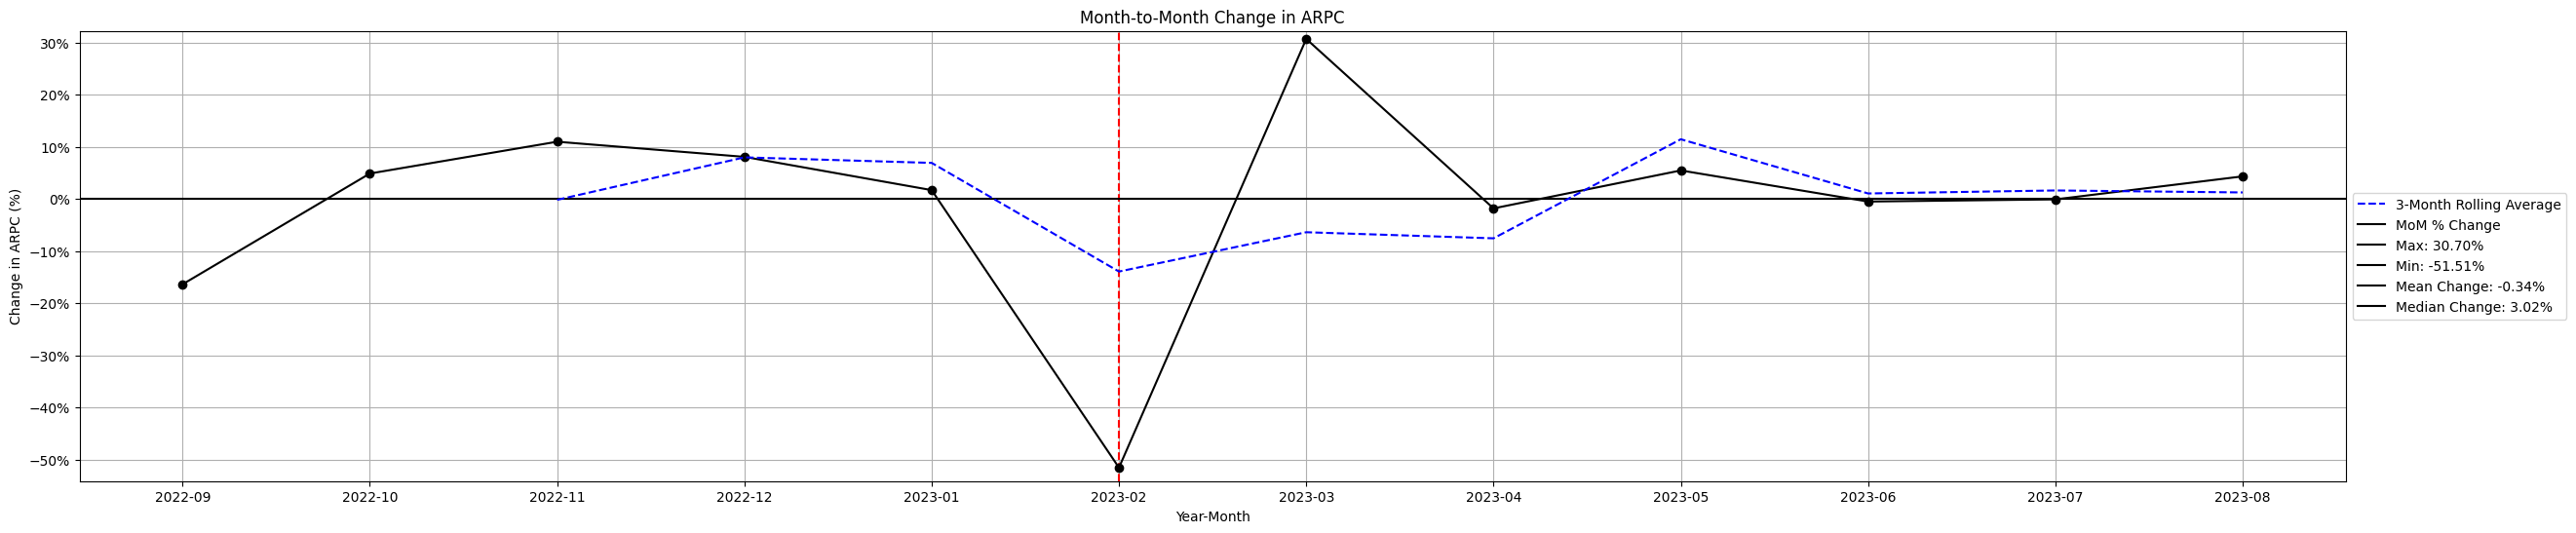

In [12]:
def monthly_avg_revenue_per_customer_change_plot(df_filtered):

    try:
        # Group by year_month_eng and customer_id to calculate total revenue per customer for each month
        monthly_revenue_per_customer = (
            df_filtered.groupby(["year_month_eng", "customer_id"])["revenue"]
            .sum()
            .reset_index()
        )

        # Calculate average revenue per customer for each month
        monthly_avg_revenue_per_customer = monthly_revenue_per_customer.groupby(
            "year_month_eng"
        )["revenue"].mean()

        # Calculate month-to-month change in average revenue per customer
        monthly_change = monthly_avg_revenue_per_customer.diff()

        # Calculate 3-month rolling average of the change
        rolling_average = monthly_change.rolling(window=3).mean()

        # Plot month-to-month change in average revenue per customer
        plt.figure(figsize=(30, 6))
        # Adjust y-axis limits based on the percent change range, adding a buffer for clarity
        max_change = monthly_change.max()
        min_change = monthly_change.min()
        y_min_limit = min_change - (abs(min_change) * 0.05)
        y_max_limit = max_change + (abs(max_change) * 0.05)
        plt.ylim(y_min_limit, y_max_limit)

        plt.axvline(
            x=6, color="red", linestyle="--", markerfacecolor="black", label="Feb 2023"
        )
        plt.axhline(y=0, color="black", linestyle="-")
        plt.plot(
            monthly_change.index,
            monthly_change.values,
            marker="o",
            color="black",
            linestyle="-",
            label="Monthly Change",
            markerfacecolor="black",
        )
        plt.plot(
            rolling_average.index,
            rolling_average.values,
            color="blue",
            linestyle="--",
            label="3-Month Rolling Average",
            markerfacecolor="black",
        )
        plt.title("Month-to-Month Change in ARPC")
        plt.xlabel("Year-Month")
        plt.ylabel("Change in ARPC (%)")

        # Create additional legend labels and format as percent
        mean_label = f"Mean Change: {monthly_change.mean():.2f}%"
        median_label = f"Median Change: {monthly_change.median():.2f}%"
        monthly_avg_label = "Monthly Average Revenue Per Customer Percent Change"
        handles_markers_labels = [
            (
                plt.Line2D([], [], color="blue", linestyle="--"),
                "3-Month Rolling Average",
            ),
            (plt.Line2D([], [], color="black", linestyle="-"), "MoM % Change"),
        ]
        handles_max_min = [
            (
                plt.Line2D([], [], color="black", linestyle="-"),
                f"Max: {max_change:.2f}%",
            ),
            (
                plt.Line2D([], [], color="black", linestyle="-"),
                f"Min: {min_change:.2f}%",
            ),
        ]
        handles_stats = [
            (plt.Line2D([], [], color="black", linestyle="-"), mean_label),
            (plt.Line2D([], [], color="black", linestyle="-"), median_label),
        ]

        # Combine handles and labels from all legends in the desired order
        handles_labels = handles_markers_labels + handles_max_min + handles_stats

        # Create the legend
        create_legend(handles_labels)

        # Format y-axis as percentages
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")


monthly_avg_revenue_per_customer_change_plot(df_filtered)

In [13]:
# Create a tabular representation of the month-to-month percent change in ARPC to assist with validation and allow for easy business stakeholder consumption.


def monthly_average_revenue_per_customer_change_table(df_filtered):

    # Group by year-month and calculate total revenue

    monthly_revenue = (
        df_filtered.groupby("year_month_eng")["revenue"]
        .sum()
        .reset_index(name="total_revenue")
        .round(0)
    )

    # Group by year-month and calculate unique customer count

    monthly_customers = (
        df_filtered.groupby("year_month_eng")["customer_id"]
        .nunique()
        .reset_index(name="customer_count")
    )

    # Merge monthly revenue and customer count DataFrames

    monthly_avg_revenue = pd.merge(
        monthly_revenue, monthly_customers, on="year_month_eng"
    ).round(0)

    # Calculate average revenue per customer

    monthly_avg_revenue["avg_revenue_per_customer"] = (
        monthly_avg_revenue["total_revenue"].astype(float)
        / monthly_avg_revenue["customer_count"].astype(float)
    ).round(0)

    # Calculate month-to-month percent change in total revenue

    monthly_avg_revenue["monthly_pct_change"] = (
        (monthly_avg_revenue["total_revenue"].pct_change().fillna(0) * 100).round(2)
    ).apply(lambda x: "{:.2f}%".format(x))

    # Format average revenue per customer as dollar amount

    monthly_avg_revenue["avg_revenue_per_customer"] = monthly_avg_revenue[
        "avg_revenue_per_customer"
    ].apply(lambda x: "${:,.0f}".format(x))

    # Format total revenue as dollar amount

    monthly_avg_revenue["total_revenue"] = monthly_avg_revenue["total_revenue"].apply(
        lambda x: "${:,.0f}".format(x)
    )

    # Rename columns
    monthly_avg_revenue.rename(
        columns={"year_month_eng": "year_month", "avg_revenue_per_customer": "ARPC"},
        inplace=True,
    )

    # Print the DataFrame

    tablefmt = "rounded_grid"
    print(
        tabulate.tabulate(
            monthly_avg_revenue,
            headers="keys",
            tablefmt=tablefmt,
            showindex=False,
            numalign="center",
            stralign="center",
        )
    )


# Call the function


monthly_average_revenue_per_customer_change_table(df_filtered)

╭──────────────┬─────────────────┬──────────────────┬────────┬──────────────────────╮
│  year_month  │  total_revenue  │  customer_count  │  ARPC  │  monthly_pct_change  │
├──────────────┼─────────────────┼──────────────────┼────────┼──────────────────────┤
│   2022-08    │    $833,115     │       1285       │  $648  │        0.00%         │
├──────────────┼─────────────────┼──────────────────┼────────┼──────────────────────┤
│   2022-09    │    $799,055     │       1264       │  $632  │        -4.09%        │
├──────────────┼─────────────────┼──────────────────┼────────┼──────────────────────┤
│   2022-10    │    $809,238     │       1271       │  $637  │        1.27%         │
├──────────────┼─────────────────┼──────────────────┼────────┼──────────────────────┤
│   2022-11    │    $832,119     │       1293       │  $644  │        2.83%         │
├──────────────┼─────────────────┼──────────────────┼────────┼──────────────────────┤
│   2022-12    │    $848,953     │       1302       │ 

## Monthly ARPC Trends Assessment: 
---
> ### Pre-Launch Trends: 
> * Leading up to February 2023, ARPC shows a modest yet steady growth to a peak of $652 in December 2022. This indicates a gradually increasing customer spending pattern, demonstrating effective engagement strategies or product offerings that incrementally enhanced customer value.
> 
> ### Impact of the February 2023 Launch: 
> * February 2023 marks a significant turning point, with ARPC dropping to $605, reflecting a -12.59% change from January 2023. This abrupt decline suggests that the launch may have initially disrupted customer spending habits or failed to meet customer expectations, leading to a decrease in average revenue per customer.
> 
> ### Post-Launch Recovery and Trends: 
> * Following the dip in February, ARPC starts to recover in March 2023, increasing to $627, which represents an 8.58% rebound. However, the following months exhibit fluctuations with slight increases and decreases, indicating a period of stabilization as customers adjust to the new website features.
> 
> ### Long-Term Observations: 
> * By August 2023, ARPC stabilizes to $636, suggesting a recovery towards pre-launch levels but not exceeding the peak observed in December 2022. This recovery implies that while the initial impact of the launch was negative, subsequent adjustments or improvements may have gradually restored customer confidence and spending.

---

## Step 10: Analyzing Average Revenue Per Unit (ARPU)
---

This stage focuses on evaluating the Average Revenue Per Unit (ARPU), a critical metric that sheds light on revenue efficiency per transaction. 

> ### 10.1 ARPU Trend Visualization
> average_revenue_per_unit_monthly_plot(df_filtered): This function plots the ARPU over time, highlighting how revenue efficiency per transaction evolves. By marking the timeline with the February 2023 launch date, it becomes possible to visually assess the launch's immediate and lasting effects on ARPU. The incorporation of a 3-month rolling average helps smooth out short-term fluctuations, offering a clearer view of underlying trends.
> 
> ### 10.2 Month-to-Month ARPU Change Analysis
> monthly_average_revenue_per_unit_change_plot(df_filtered): By calculating and plotting the percentage change in ARPU month-to-month, this function reveals the volatility and direction of changes in revenue efficiency following the launch. Identifying periods of significant increase or decrease in ARPU can indicate how well the new website feature has been received by customers and its effectiveness in enhancing sales efficiency.
> 
> ### 10.3 Tabular Overview of ARPU Changes
> monthly_average_revenue_per_unit_table(df_filtered): Complementing visual insights, this function presents a tabulated view of ARPU changes, offering a detailed month-to-month comparison. By providing a clear, numeric breakdown of changes in revenue efficiency per transaction, this table allows for a straightforward assessment of the launch's impact over time, highlighting any patterns of recovery or adjustment in the months following the launch.


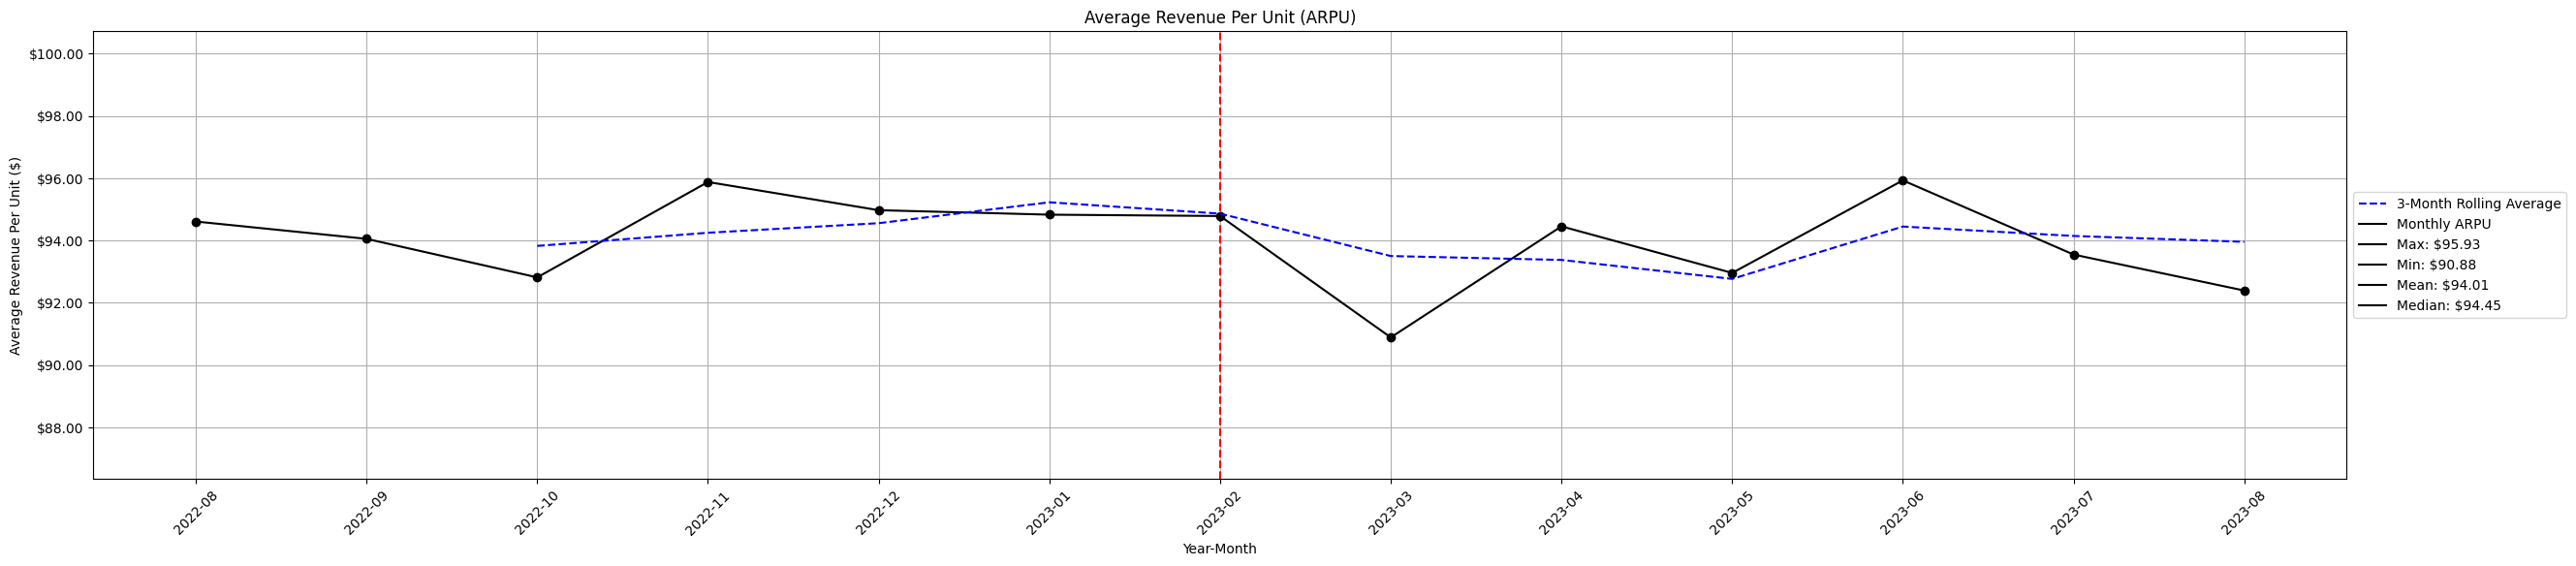

In [14]:
def average_revenue_per_unit_monthly_plot(df_filtered):
    monthly_revenue = (
        df_filtered.groupby("year_month_eng")["revenue"]
        .sum()
        .reset_index(name="total_revenue")
    )
    monthly_orders = (
        df_filtered.groupby("year_month_eng")["order_id"]
        .nunique()
        .reset_index(name="order_count")
    )
    monthly_ARPU = pd.merge(monthly_revenue, monthly_orders, on="year_month_eng")
    monthly_ARPU["ARPU"] = monthly_ARPU["total_revenue"] / monthly_ARPU["order_count"]
    plt.figure(figsize=(30, 6))

    plt.axvline(x=6, color="red", linestyle="--", label="Feb 2023")
    plt.axhline(y=0, color="black", linestyle="-")
    plt.plot(
        monthly_ARPU["year_month_eng"],
        monthly_ARPU["ARPU"],
        color="black",
        marker="o",
        label="Monthly Average Order Value",
    )
    plt.plot(
        monthly_ARPU["year_month_eng"],
        monthly_ARPU["ARPU"].rolling(window=3).mean(),
        color="blue",
        linestyle="--",
        label="3-Month Rolling Average",
    )
    # Calculate y-axis limits based on plus or minus 5% of the min and max average order value
    y_min_limit = monthly_ARPU["ARPU"].min() * 0.95
    y_max_limit = monthly_ARPU["ARPU"].max() * 1.05
    plt.ylim(y_min_limit, y_max_limit)
    plt.title("Average Revenue Per Unit (ARPU)")
    plt.xlabel("Year-Month")
    # plt.xlabel("Year-Month")
    plt.ylabel("Average Revenue Per Unit ($)")
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter("${:,.2f}".format)

    # Calculate additional metrics
    mean_ARPU = monthly_ARPU["ARPU"].mean()
    median_ARPU = monthly_ARPU["ARPU"].median()
    min_ARPU = monthly_ARPU["ARPU"].min()
    max_ARPU = monthly_ARPU["ARPU"].max()

    # Create additional legend labels
    mean_label, median_label, min_label, max_label = create_additional_legend_labels(
        monthly_ARPU, "ARPU"
    )

    handles_markers_labels = [
        (plt.Line2D([], [], color="blue", linestyle="--"), "3-Month Rolling Average"),
        (
            plt.Line2D([], [], color="black", linestyle="-"),
            "Monthly ARPU",
        ),
    ]

    handles_additional_metrics = [
        (plt.Line2D([], [], color="black", linestyle="-"), max_label),
        (plt.Line2D([], [], color="black", linestyle="-"), min_label),
        (plt.Line2D([], [], color="black", linestyle="-"), mean_label),
        (plt.Line2D([], [], color="black", linestyle="-"), median_label),
    ]

    # Combine handles and labels from all legends
    handles_labels = handles_markers_labels + handles_additional_metrics

    # Create the legend
    create_legend(handles_labels)
    plt.grid(True)
    plt.show()


average_revenue_per_unit_monthly_plot(df_filtered)

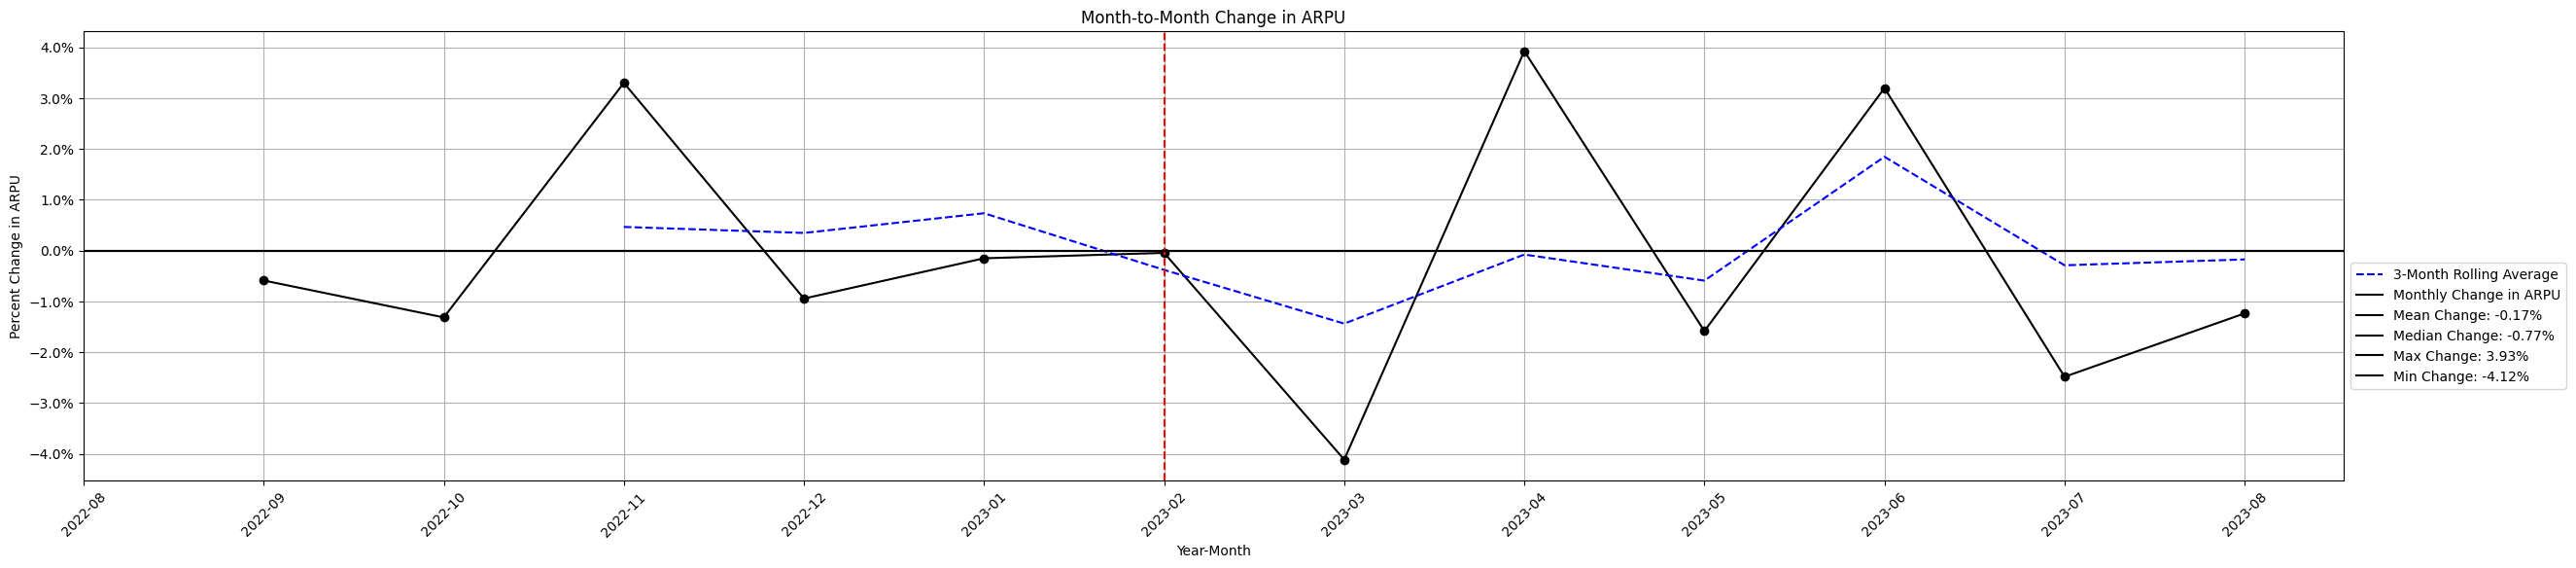

In [15]:
def monthly_average_revenue_per_unit_change_plot(df_filtered):
    """ """
    try:
        # Convert "year_month_eng" to datetime type and then fomat it to year-month
        df_filtered["year_month_eng"] = pd.to_datetime(df_filtered["year_month_eng"])
        df_filtered["year_month_eng"] = df_filtered["year_month_eng"].dt.strftime(
            "%Y-%m"
        )
        monthly_revenue = (
            df_filtered.groupby("year_month_eng")["revenue"]
            .sum()
            .reset_index(name="total_revenue")
        )
        monthly_orders = (
            df_filtered.groupby("year_month_eng")["order_id"]
            .nunique()
            .reset_index(name="order_count")
        )
        monthly_ARPU = pd.merge(monthly_revenue, monthly_orders, on="year_month_eng")
        monthly_ARPU["ARPU"] = (
            monthly_ARPU["total_revenue"] / monthly_ARPU["order_count"]
        )
        # Set year_month_eng as index
        monthly_ARPU.set_index("year_month_eng", inplace=True)

        # Calculate month-to-month change in average revenue per customer
        monthly_change = monthly_ARPU["ARPU"].pct_change() * 100

        # Calculate 3-month rolling average of the change
        rolling_average = monthly_change.rolling(window=3).mean()

        # Plot settings
        plt.figure(figsize=(30, 6))
        max_change = monthly_change.max()
        min_change = monthly_change.min()
        y_min_limit = min_change - (
            abs(min_change) * 0.1
        )  # Adjusted buffer for clarity
        y_max_limit = max_change + (abs(max_change) * 0.1)
        plt.ylim(y_min_limit, y_max_limit)

        plt.axhline(y=0, color="black", linestyle="-")
        plt.plot(
            monthly_change.index,
            monthly_change.values,
            marker="o",
            color="black",
            linestyle="-",
            label="Monthly Change in ARPU",
            markerfacecolor="black",
        )
        plt.plot(
            rolling_average.index,
            rolling_average.values,
            color="blue",
            linestyle="--",
            label="3-Month Rolling Average",
            markerfacecolor="black",
        )
        # Add a vertical line for Feb 2023 to the plot
        plt.axvline(x=6, color="red", linestyle="--", label="Feb 2023")
        plt.axhline(y=0, color="black", linestyle="-")

        plt.title("Month-to-Month Change in ARPU")
        plt.xlabel("Year-Month")
        plt.ylabel("Percent Change in ARPU")

        # Additional stats for legend
        mean_label = f"Mean Change: {monthly_change.mean():.2f}%"
        median_label = f"Median Change: {monthly_change.median():.2f}%"
        max_label = f"Max Change: {monthly_change.max():.2f}%"
        min_label = f"Min Change: {monthly_change.min():.2f}%"
        mean_line = plt.Line2D([], [], color="black", linestyle="-")
        median_line = plt.Line2D([], [], color="black", linestyle="-")
        max_line = plt.Line2D([], [], color="black", linestyle="-")
        min_line = plt.Line2D([], [], color="black", linestyle="-")
        handles_stats = [mean_line, median_line, max_line, min_line]
        labels_stats = [mean_label, median_label, max_label, min_label]

        # Create legend
        line1 = plt.Line2D([], [], color="blue", linestyle="--")
        line2 = plt.Line2D([], [], color="black", linestyle="-")
        handles = [line1, line2] + handles_stats
        labels = ["3-Month Rolling Average", "Monthly Change in ARPU"] + labels_stats
        plt.legend(
            handles=handles,
            labels=labels,
            loc="upper left",
            bbox_to_anchor=(1, 0.5),
            frameon=True,
        )
        # Format y-axis as percentages
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.grid(True)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        # plot all the months in the x-axis in the format of year-month
        plt.xticks(monthly_ARPU.index, monthly_ARPU.index, rotation=45)

        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")


monthly_average_revenue_per_unit_change_plot(df_filtered)

In [16]:
def monthly_average_revenue_per_unit_table(df_filtered):
    """Prints the year_month, ARPU, percent change, and order count columns from the input DataFrame."""
    try:
        monthly_revenue = (
            df_filtered.groupby("year_month_eng")["revenue"]
            .sum()
            .reset_index(name="total_revenue")
        )
        monthly_orders = (
            df_filtered.groupby("year_month_eng")["order_id"]
            .nunique()
            .reset_index(name="order_count")
        )
        monthly_ARPU = pd.merge(monthly_revenue, monthly_orders, on="year_month_eng")
        monthly_ARPU["ARPU"] = (
            monthly_ARPU["total_revenue"] / monthly_ARPU["order_count"]
        )
        monthly_ARPU["percent_change"] = (
            (monthly_ARPU["ARPU"].pct_change() * 100)
            .fillna(0)
            .apply(lambda x: "{:.2f}%".format(x))
        )
        # Format ARPU as dollar amount
        monthly_ARPU["ARPU"] = monthly_ARPU["ARPU"].apply(
            lambda x: "${:,.2f}".format(x)
        )
        monthly_ARPU.rename(columns={"year_month_eng": "year_month"}, inplace=True)

        tablefmt = "rounded_grid"
        print(
            tabulate.tabulate(
                monthly_ARPU[["year_month", "order_count", "ARPU", "percent_change"]],
                headers="keys",
                tablefmt=tablefmt,
                showindex=False,
                numalign="center",
                stralign="center",
            )
        )
    except Exception as e:
        print(f"An error occurred: {e}")


# Call the function with the appropriate DataFrame
monthly_average_revenue_per_unit_table(df_filtered)

╭──────────────┬───────────────┬────────┬──────────────────╮
│  year_month  │  order_count  │  ARPU  │  percent_change  │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2022-08    │     8806      │ $94.61 │      0.00%       │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2022-09    │     8496      │ $94.05 │      -0.59%      │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2022-10    │     8719      │ $92.81 │      -1.32%      │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2022-11    │     8679      │ $95.88 │      3.30%       │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2022-12    │     8939      │ $94.97 │      -0.94%      │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2023-01    │     8990      │ $94.83 │      -0.15%      │
├──────────────┼───────────────┼────────┼──────────────────┤
│   2023-02    │     7862      │ $94.78 │      -0.05%      │
├──────────────┼────────

## ARPU Assessment
---
> ### Pre-Launch Stability: 
> * Prior to the February 2023 launch, ARPU exhibited minor fluctuations, maintaining a stable revenue efficiency per transaction. This period of relative stability, with ARPU hovering around $94, suggests consistent customer spending per order, indicative of steady market conditions and effective pricing strategies.
> 
> ### Immediate Launch Impact: 
> * The February 2023 launch saw a very slight decrease in ARPU (-0.05%), indicating an almost negligible immediate impact on the revenue generated per transaction. This resilience in ARPU, despite a notable drop in total sales revenue during the same period, underscores a maintained transaction value among remaining customers.
> 
> ### Significant Post-Launch Variability:
> * The most pronounced change occurred in March 2023 with a -4.12% dip in ARPU, signifying potential delayed reactions to the website feature launch or external factors affecting customer spending habits. This period marked the beginning of more significant fluctuations in ARPU, reflecting a phase of customer adjustment and market response to the new website features.
> 
> ### Recovery and Subsequent Fluctuations: 
> * April 2023 witnessed a rebound in ARPU (+3.93%), showcasing a partial recovery in transaction value. However, the months that followed continued to see variability in ARPU, indicating ongoing adjustments in customer spending behavior and possibly the broader economic influences.
> 
> ### Longer-Term Trend:
> * By August 2023, ARPU adjusted to $92.39, slightly lower than the pre-launch figures. This gradual decline over the months following the launch suggests a subtle long-term adjustment in how much customers are willing to spend per transaction, potentially influenced by the new website features or changing market dynamics.




# __Conclusion & Key Findings:__
---
> ## Sales Revenue Impact: 
> * The immediate aftermath of the February 2023 launch saw a significant drop in sales revenue, indicating initial customer resistance or dissatisfaction. However, a gradual recovery in the following months suggests adaptation and potential acceptance of the new features.
> ## Customer Spending Behavior (ARPC):
> * ARPC experienced a sharp decline in February 2023, mirroring the drop in sales revenue, but showed signs of recovery and stabilization thereafter. This fluctuation underscores the initial shock to customer spending habits, followed by an adjustment period leading to a near return to pre-launch spending levels.
>
> ## Transaction Value Efficiency (ARPU): 
> * ARPU remained relatively stable immediately following the launch but underwent fluctuations in the subsequent months. The overall slight decline in ARPU by August 2023 points to a long-term adjustment in revenue efficiency per transaction, possibly reflecting changes in purchasing behavior or market conditions.
>
> ## Actionable Insights:
> Customer Engagement and Feedback 
> * The initial negative impact on sales and ARPC highlights the need for enhanced customer engagement strategies post-launch. Actively seeking and incorporating customer feedback can help identify pain points and areas for improvement in new website features.
>
> Continuous Monitoring and Agile Response
> * The fluctuations observed post-launch in both ARPC and ARPU underscore the importance of ongoing monitoring of sales performance metrics. Being agile and ready to make iterative improvements based on real-time data can enhance customer satisfaction and financial outcomes.
>
> ## Final Thoughts:
> This analysis reveals that while the February 2023 website feature launch initially disrupted sales and customer spending patterns, there is evidence of recovery and adaptation over time. To build on this momentum, it's crucial to engage with customers actively and remain responsive to market feedback. By leveraging these insights, a company can better navigate future digital transformations, minimize negative impacts, and harness opportunities for growth.

